In [21]:
%matplotlib inline
import pandas as pd
import os
import bidi.algorithm
import arabic_reshaper
import matplotlib.pyplot as plt

In [2]:
fpath = '/media/sf_VBox_Shared/Arabic/Analyses/Fiqh_final2/quotes'
os.listdir(fpath)

['fiqh_quran_aya_nodes.csv',
 'fiqh_quran_book_nodes.csv',
 'fiqh_quran_links.csv',
 'links_projected_books.csv',
 'quotes_merged.csv',
 'quran_quotes.csv']

In [3]:
links_df = pd.read_csv(os.path.join(fpath, 'fiqh_quran_links.csv'))
nodes_aya_df = pd.read_csv(os.path.join(fpath, 'fiqh_quran_aya_nodes.csv'))
nodes_books_df = pd.read_csv(os.path.join(fpath, 'fiqh_quran_book_nodes.csv'))
quotes_df = pd.read_csv(os.path.join(fpath, 'quran_quotes.csv'))

In [4]:
links_df.head()

,Source,Target,Weight
0,0179MalikIbnAnas.Muwatta,"(1.0, 4.0)",1
1,0179MalikIbnAnas.Muwatta,"(1.0, 5.0)",1
2,0179MalikIbnAnas.Muwatta,"(2.0, 156.0)",1
3,0179MalikIbnAnas.Muwatta,"(2.0, 178.0)",2
4,0179MalikIbnAnas.Muwatta,"(2.0, 180.0)",1


In [5]:
nodes_aya_df.head()

,id,sura_id,aya_id,sura_name,sura_arabic_name,Type,Label,Group
0,"(65.0, 2.0)",65,2,At-Talaq,الطلاق,aya,At-Talaq 2,aya
1,"(112.0, 1.0)",112,1,Al-Ikhlas,الإخلاص,aya,Al-Ikhlas 1,aya
2,"(65.0, 4.0)",65,4,At-Talaq,الطلاق,aya,At-Talaq 4,aya
3,"(2.0, 196.0)",2,196,Al-Baqarah,البقرة,aya,Al-Baqarah 196,aya
4,"(24.0, 6.0)",24,6,An-Nur,النور,aya,An-Nur 6,aya


In [6]:
merged_df = links_df.merge(nodes_aya_df, left_on='Target', right_on='id')[['Source', 'Weight', 'sura_id', 'aya_id', 'sura_name', 'sura_arabic_name', 'Label']]
merged_df = merged_df.rename({'Label': 'aya_label'}, axis=1)
merged_df = merged_df.merge(nodes_books_df, left_on='Source', right_on='id')
merged_df = merged_df.drop(['Source', 'id', 'Type', 'Group', 'Label'], axis=1)

In [7]:
#merged_df.to_csv(os.path.join(fpath, 'quotes_merged.csv'), index=False)

In [83]:
# Nr of quotes per book (including quotes that were not found using alfanous)
#quotes_df.BookURI.value_counts().plot(kind='bar', figsize=(15,8))

In [38]:
def reshape_arabic(text):
    return bidi.algorithm.get_display(arabic_reshaper.reshape(text))

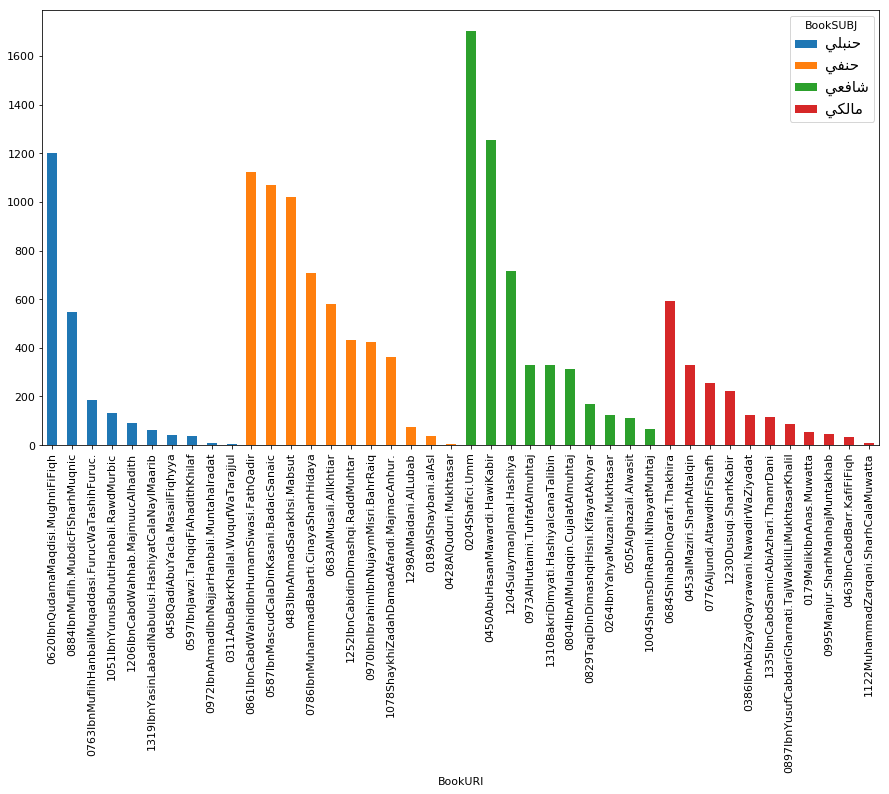

In [59]:
# Nr of quotes per book, sorted per school
count_per_book = merged_df.groupby(['BookURI', 'BookSUBJ'])['Weight'].sum().unstack()
barplot = count_per_book.sort_values(list(count_per_book.columns), ascending=False).plot(kind='bar', stacked=True, figsize=(15,8))
leg = barplot.axes.get_legend()
for t in leg.get_texts():
    t.set_text(reshape_arabic(t.get_text()))
    t.set_fontsize(15)
plt.show()

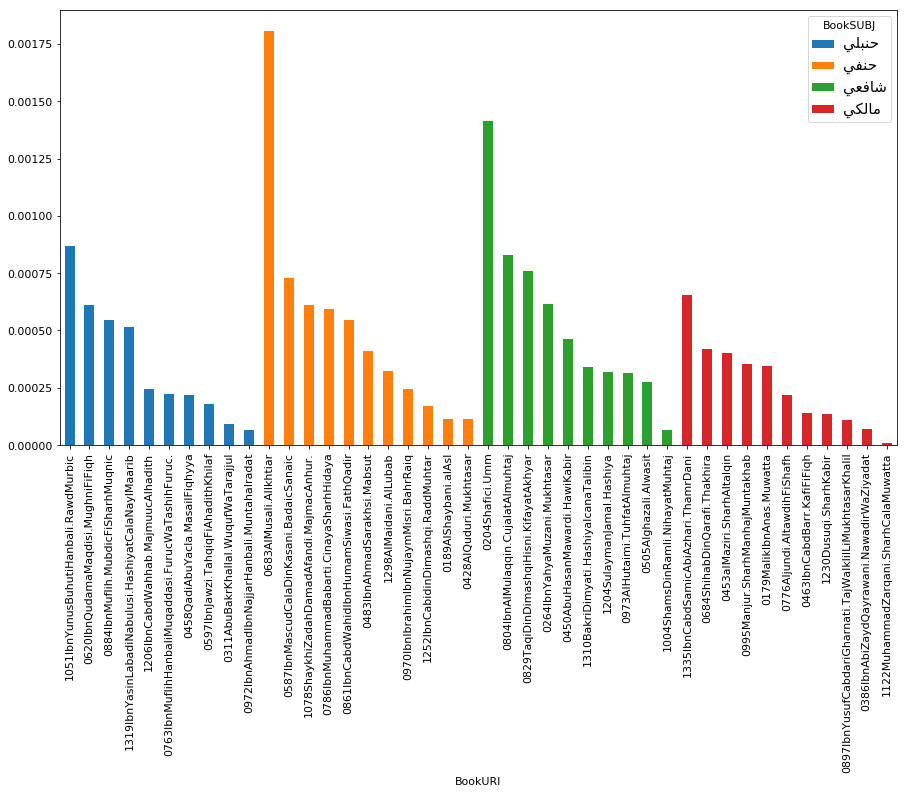

In [58]:
# Relative of quotes per book (divided by length of book) , sorted per school
nr_tokens_per_book = merged_df.groupby(['BookURI', 'BookSUBJ'])['Number_of_tokens'].min()
rel_count_per_book = merged_df.groupby(['BookURI', 'BookSUBJ'])['Weight'].sum() / nr_tokens_per_book
rel_count_per_book = rel_count_per_book.unstack()
barplot = rel_count_per_book.sort_values(list(rel_count_per_book.columns), ascending=False).plot(kind='bar', stacked=True, figsize=(15,8))
leg = barplot.axes.get_legend()
for t in leg.get_texts():
    t.set_text(reshape_arabic(t.get_text()))
    t.set_fontsize(15)
plt.show()

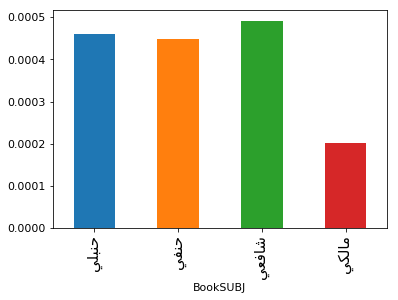

In [70]:
rel_count_per_school = merged_df.groupby('BookSUBJ')['Weight'].sum() / nr_tokens_per_book.groupby('BookSUBJ').sum() 
barplot = rel_count_per_school.plot(kind='bar')
barplot.set_xticklabels([reshape_arabic(t.get_text()) for t in barplot.xaxis.get_ticklabels()])
plt.xticks(fontsize=15)
plt.show()

In [24]:
# What are the verses cited by most books?
merged_df.aya_label.value_counts()[:20]

An-Nisa' 43       31
An-Nur 33         28
Al-Baqarah 228    28
An-Nisa' 23       28
Al-Ma'idah 6      28
Al-Ikhlas 1       27
Al-Baqarah 184    27
Al-Baqarah 282    27
Al-Baqarah 185    27
Al-Ma'idah 95     27
At-Tawba 103      27
An-Nisa' 11       27
Al-Ma'idah 2      27
Al-Baqarah 196    27
At-Tawba 60       26
Al-Baqarah 222    26
Al-Baqarah 229    26
Al-Mujadila 3     25
Al-Baqarah 178    25
An-Nisa' 25       25
Name: aya_label, dtype: int64

In [36]:
#What are the verses that are most often cited in total?
merged_df.groupby('aya_label')['Weight'].sum().sort_values(ascending=False)[:20]

aya_label
An-Nisa' 23       220
An-Nisa' 43       218
Al-Baqarah 282    211
Al-Baqarah 196    207
Al-Ma'idah 95     199
An-Nisa' 11       197
Al-Ma'idah 6      186
Al-Baqarah 229    163
Al-Baqarah 233    160
Al-Baqarah 228    145
At-Talaq 2        140
Al-Ma'idah 45     122
At-Talaq 1        122
Al-Mujadila 3     122
Al-Baqarah 237    119
An-Nisa' 24       119
Al-Baqarah 222    111
Al-Baqarah 178    110
Al-Ma'idah 89     109
An-Nur 4          108
Name: Weight, dtype: int64

In [37]:
# What are the verses cited by most books, per school?
for school in merged_df.BookSUBJ.unique():
    print(school)
    df_sub = merged_df[merged_df.BookSUBJ==school]
    print('Nr of books: ', df_sub.BookURI.nunique())
    print(df_sub.aya_label.value_counts()[:20])
    print('\n')

مالكي
Nr of books:  11
Al-Ma'idah 5      7
Al-Ma'idah 2      7
Al-Ikhlas 1       7
At-Tawba 103      7
An-Nur 33         7
Al-Ma'idah 45     7
An-Nisa' 43       7
Sad 24            6
Al-Baqarah 238    6
An-Nisa' 11       6
Al-Baqarah 280    6
Al-Ala 1          6
Al-Ma'idah 6      6
Al-Hajj 77        6
Al-Baqarah 185    6
Al-Mujadila 4     5
Al-Baqarah 187    5
An-Nisa' 25       5
Muhammad 33       5
Al-Ma'idah 95     5
Name: aya_label, dtype: int64


شافعي
Nr of books:  10
An-Nisa' 43       10
Al-Baqarah 222    10
Al-Ma'idah 6       9
An-Nisa' 25        9
An-Nisa' 23        9
Al-Baqarah 267     9
At-Talaq 2         9
At-Talaq 6         9
Al-Baqarah 282     9
Al-Baqarah 229     9
At-Tawba 28        9
Al-Baqarah 233     9
Al-Ala 1           8
An-Nur 33          8
Al-Baqarah 185     8
Al-Ma'idah 3       8
An-Nisa' 34        8
Al-Baqarah 228     8
At-Tawba 103       8
Al-Jumua 9         8
Name: aya_label, dtype: int64


حنفي
Nr of books:  11
At-Tawba 60       11
Al-Anfal 41       10
Al-Muj

In [72]:
# What are most often cited books, per school?
for school in merged_df.BookSUBJ.unique():
    print(school)
    df_sub = merged_df[merged_df.BookSUBJ==school]
    print('Nr of citations: ', df_sub.Weight.sum())
    print(df_sub.groupby('aya_label')['Weight'].sum().sort_values(ascending=False)[:20])
    print('\n')

مالكي
Nr of citations:  1863
aya_label
An-Nisa' 11       37
An-Nisa' 43       34
Al-Ma'idah 6      29
An-Nisa' 23       28
An-Nisa' 6        24
An-Nur 33         21
Al-Baqarah 282    21
Al-Ma'idah 45     19
An-Nisa' 25       18
Al-Ma'idah 1      18
Al-Baqarah 283    18
Al-Baqarah 237    16
Al-Baqarah 275    16
Al-Ma'idah 95     15
Al-Baqarah 222    15
Al-Jumua 9        15
Al-Baqarah 196    14
An-Nisa' 101      13
At-Tawba 103      13
An-Nisa' 24       13
Name: Weight, dtype: int64


شافعي
Nr of citations:  5115
aya_label
Al-Baqarah 282     104
Al-Baqarah 229      84
An-Nisa' 43         80
Al-Ma'idah 95       77
Al-Baqarah 196      69
At-Talaq 2          69
Al-Ma'idah 6        53
An-Nisa' 23         53
Al-Mumtahina 10     52
Al-Baqarah 228      52
Al-Baqarah 222      49
Al-Baqarah 237      47
An-Nur 33           45
An-Nisa' 11         45
An-Nisa' 25         44
At-Talaq 1          44
Al-Mujadila 3       43
An-Nisa' 6          41
Al-Baqarah 178      41
An-Nisa' 12         39
Name: Weight,

## NLP approaches

In [83]:
adj_df = merged_df.pivot('BookURI', 'aya_label', 'Weight').fillna(0)

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(adj_df.values)
print(tfidf.shape)

(42, 2003)


In [112]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(tfidf, tfidf)
similarities.shape

(42, 42)

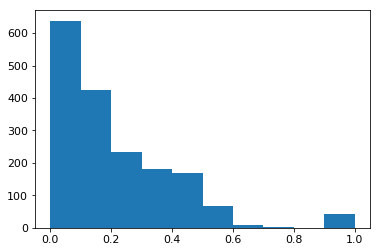

In [113]:
plt.hist(similarities.flatten());

In [114]:
import numpy as np
similarities_df = pd.DataFrame(similarities, columns=adj_df.index, index=adj_df.index)
np.fill_diagonal(similarities_df.values, 0)

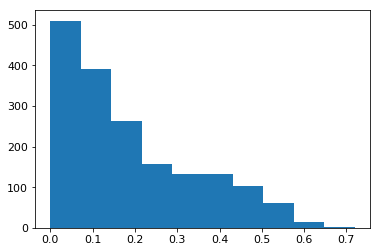

In [115]:
plt.hist(similarities_df.values.flatten());

In [116]:
from sklearn.metrics.pairwise import cosine_distances

from sklearn.manifold import TSNE

dist = cosine_distances(tfidf, tfidf)

X_embedded = TSNE(n_components=2, metric='precomputed').fit_transform(dist)
print(X_embedded.shape)

(42, 2)


In [136]:
df_books_embedded = pd.DataFrame(X_embedded, index=adj_df.index, columns=['x', 'y'])

In [137]:
df_books_embedded.head()

,x,y
BookURI,,
0179MalikIbnAnas.Muwatta,135.664795,-127.949265
0189AlShaybani.alAsl,202.750046,13.498761
0204Shafici.Umm,66.823586,36.305813
0264IbnYahyaMuzani.Mukhtasar,62.476604,153.875183
0311AbuBakrKhallal.WuqufWaTarajjul,-215.616364,111.999939


In [138]:
df_books_embedded = df_books_embedded.merge(nodes_books_df, right_on='BookURI', left_on='BookURI')

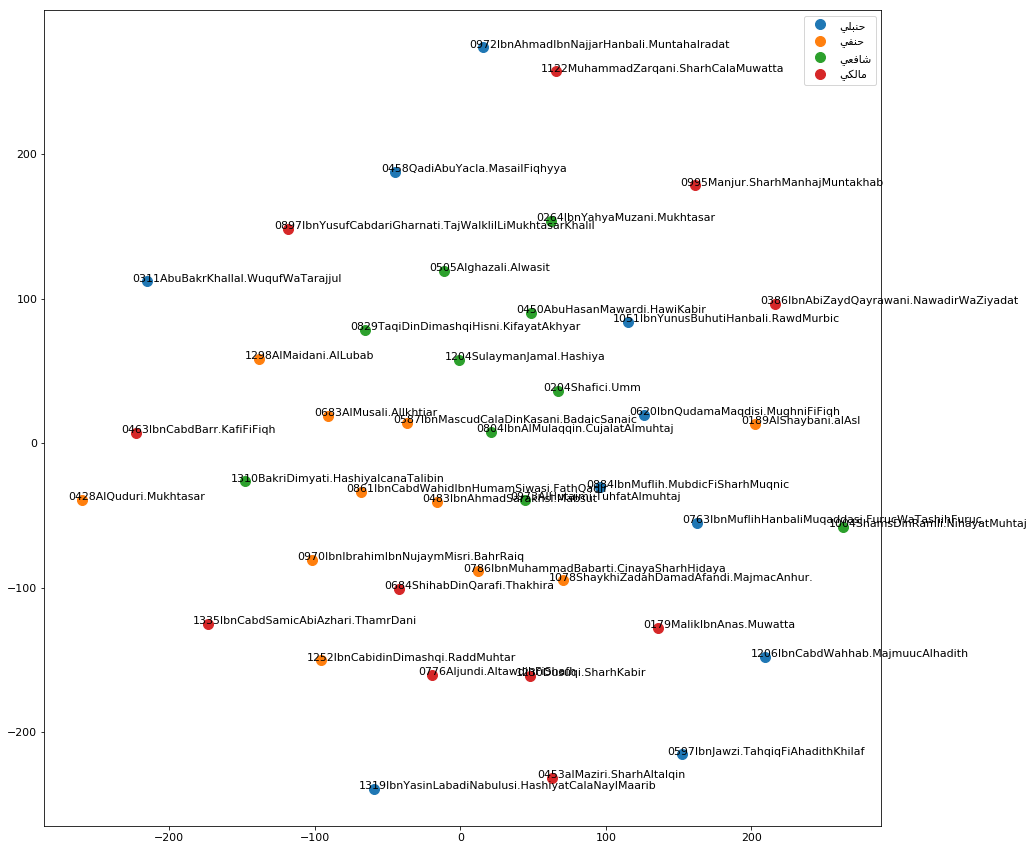

In [147]:
fig, ax = plt.subplots(figsize=(15,15))
for subj, group in df_books_embedded.groupby('BookSUBJ'):
    ax.plot(group.x, group.y, label=reshape_arabic(subj), marker='o', linestyle='', markersize=10)
    for x,y,s in zip(group.x, group.y, group.BookURI):
        ax.text(x-10, y, s)
ax.legend()
plt.show()

## Network analysis

In [104]:
import networkx as nx

In [105]:
nw_similarities = nx.from_pandas_adjacency(similarities_df)
list(nw_similarities.edges(data=True))[:10]

[('0179MalikIbnAnas.Muwatta',
  '0189AlShaybani.alAsl',
  {'weight': 0.0587153201562486}),
 ('0179MalikIbnAnas.Muwatta',
  '0204Shafici.Umm',
  {'weight': 0.2301601481975677}),
 ('0179MalikIbnAnas.Muwatta',
  '0264IbnYahyaMuzani.Mukhtasar',
  {'weight': 0.11823540457824286}),
 ('0179MalikIbnAnas.Muwatta',
  '0386IbnAbiZaydQayrawani.NawadirWaZiyadat',
  {'weight': 0.08265935054714874}),
 ('0179MalikIbnAnas.Muwatta',
  '0450AbuHasanMawardi.HawiKabir',
  {'weight': 0.16582454070539274}),
 ('0179MalikIbnAnas.Muwatta',
  '0453alMaziri.SharhAltalqin',
  {'weight': 0.03350340128348844}),
 ('0179MalikIbnAnas.Muwatta',
  '0458QadiAbuYacla.MasailFiqhyya',
  {'weight': 0.05633853153888774}),
 ('0179MalikIbnAnas.Muwatta',
  '0463IbnCabdBarr.KafiFiFiqh',
  {'weight': 0.06217425970694872}),
 ('0179MalikIbnAnas.Muwatta',
  '0483IbnAhmadSarakhsi.Mabsut',
  {'weight': 0.19971305803085115}),
 ('0179MalikIbnAnas.Muwatta',
  '0505Alghazali.Alwasit',
  {'weight': 0.14080803019709603})]

In [106]:
nx.to_pandas_edgelist(nw_similarities).to_csv(os.path.join(fpath, 'links_tfidf_books.csv'), index=False)

In [74]:
network = nx.from_pandas_edgelist(links_df, source='Source', target='Target', edge_attr='Weight')

In [75]:
nx.algorithms.is_bipartite(network)

True

In [76]:
# Get projected graphs
book_ids = links_df.Source.unique()
nw_books_jaccard = nx.algorithms.bipartite.overlap_weighted_projected_graph(network, book_ids)
nw_books_overlap

In [79]:
list(nw_books.edges(data=True))[:10]

[('0179MalikIbnAnas.Muwatta',
  '1310BakriDimyati.HashiyaIcanaTalibin',
  {'weight': 0.07450980392156863}),
 ('0179MalikIbnAnas.Muwatta',
  '1204SulaymanJamal.Hashiya',
  {'weight': 0.061611374407582936}),
 ('0179MalikIbnAnas.Muwatta',
  '1319IbnYasinLabadiNabulusi.HashiyatCalaNaylMaarib',
  {'weight': 0.07142857142857142}),
 ('0179MalikIbnAnas.Muwatta',
  '0786IbnMuhammadBabarti.CinayaSharhHidaya',
  {'weight': 0.07666666666666666}),
 ('0179MalikIbnAnas.Muwatta',
  '1051IbnYunusBuhutiHanbali.RawdMurbic',
  {'weight': 0.16101694915254236}),
 ('0179MalikIbnAnas.Muwatta',
  '0483IbnAhmadSarakhsi.Mabsut',
  {'weight': 0.05450733752620545}),
 ('0179MalikIbnAnas.Muwatta', '0683AlMusali.AlIkhtiar', {'weight': 0.08125}),
 ('0179MalikIbnAnas.Muwatta',
  '0587IbnMascudCalaDinKasani.BadaicSanaic',
  {'weight': 0.06205250596658711}),
 ('0179MalikIbnAnas.Muwatta',
  '0264IbnYahyaMuzani.Mukhtasar',
  {'weight': 0.08870967741935484}),
 ('0179MalikIbnAnas.Muwatta',
  '1004ShamsDinRamli.NihayatMuhtaj'

In [77]:
nx.to_pandas_edgelist(nw_books).to_csv(os.path.join(fpath, 'links_projected_books.csv'), index=False)